In [1]:
import numpy as np
import seaborn as sns
import torch

from pathlib import Path

In [2]:
def get_tensor_filename(sds_str:str, random_seed:int, split:str, cm:bool=False) -> str:
    if cm:
        return Path(f"/data/matthew.almeida001/PACS_Sampling_Experiments/results/{sds_str}/cm-random-seed-{random_seed}-{sds_str}-{split}.pt")
    else:
        return Path(f"/data/matthew.almeida001/PACS_Sampling_Experiments/results/{sds_str}/cm-tensor-random-seed-{random_seed}-{sds_str}-{split}-best.pt")
  

In [3]:
seed = 5980
sds_str = "sds"
split = "train"

In [4]:
def get_accuracy_by_epoch(cm_tensor: torch.Tensor) -> torch.Tensor:
    n_correct_by_epoch = torch.Tensor([torch.trace(cm_tensor[i]) for i in range(cm_tensor.shape[0])])
    return n_correct_by_epoch / torch.sum(cm_tensor[0])

In [10]:
train_filename = get_tensor_filename("sds", 4036, "train")
valid_filename = get_tensor_filename("sds", 4036, "val")
test_cm_filename = get_tensor_filename("sds", 4036, "test", True)

In [11]:
train_tensor = torch.load(train_filename)
valid_tensor = torch.load(valid_filename)
test_cm = torch.load(test_cm_filename)

In [12]:
train_accuracies = get_accuracy_by_epoch(train_tensor)
val_accuracies = get_accuracy_by_epoch(valid_tensor)

In [13]:
val_accuracies

tensor([0.7258, 0.7022, 0.6402, 0.6638, 0.5583, 0.6253, 0.6588, 0.7283, 0.6464,
        0.7246, 0.7543, 0.6042, 0.7531, 0.6799, 0.6129, 0.6787, 0.7630, 0.7035,
        0.5658, 0.7643, 0.7258, 0.6774, 0.7221, 0.6551, 0.6849, 0.6700, 0.6873,
        0.7481, 0.6774, 0.6675, 0.7953, 0.6824, 0.6476, 0.7184, 0.7481, 0.7605,
        0.7779, 0.7605, 0.7146, 0.7184, 0.7084, 0.7543, 0.7295, 0.7667, 0.7270,
        0.7357, 0.7990, 0.7767, 0.7605, 0.7122, 0.6762, 0.7593, 0.7556, 0.7593,
        0.7270, 0.7469, 0.7655, 0.7866, 0.7866, 0.6898, 0.7655, 0.7543, 0.7742,
        0.7705, 0.7916, 0.8027, 0.7667, 0.7481, 0.7742, 0.7655, 0.7854, 0.7667,
        0.7841, 0.7891, 0.7816, 0.7605, 0.7568, 0.7692, 0.7531, 0.7630, 0.7655,
        0.7705, 0.7854, 0.8065, 0.7717, 0.7940, 0.7829, 0.7717, 0.7779, 0.7891,
        0.7953, 0.7829, 0.7841, 0.7854, 0.7866, 0.7767, 0.7866, 0.7841, 0.7854,
        0.7804])

<AxesSubplot:>

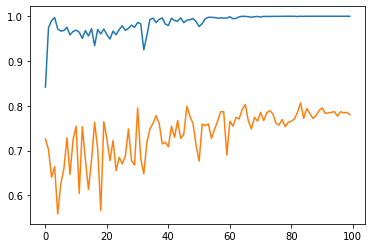

In [15]:
sns.lineplot(x=torch.arange(train_accuracies.shape[0]), y=train_accuracies)
sns.lineplot(x=torch.arange(train_accuracies.shape[0]), y=val_accuracies)

In [16]:
torch.trace(test_cm) / torch.sum(test_cm)

tensor(0.3984)